## LAB 1 - 3주차 복습

#### 미국 5개 주(캘리포니아(CA), 일리노이(IL), 텍사스(TX), 워싱톤(WA), 버지니아(VA)) 신규 확진자 변동 추이에 대해 그래프로 분석하세요.

> 참조 - 정우준 과제

In [ ]:
import pandas as pd

In [ ]:
us_df = pd.read_csv('us-covid19.csv')

In [ ]:
us_df.head()

In [ ]:
state = ['CA','IL','TX','WA','VA']

for i in state:
    globals()[f'{i}_total'] = us_df.query(f"state == '{i}'")[['date_updated','new_cases']]
    globals()[f'{i}_total']['date1'] = pd.to_datetime(globals()[f'{i}_total'].loc[:, "date_updated"])
    globals()[f'{i}_total'] = globals()[f'{i}_total'][['date1', 'new_cases']].rename(columns={'new_cases': i})

> F 문자열 포메팅(f-string) 예제 1

In [ ]:
# F 문자열 포메팅(f-string) 예제 1
year = 2019
area = "서울"

str = f'나는 {year}년도에 {area}에 살았다'
print(str)

> F 문자열 포메팅(f-string) 예제 2

In [ ]:
# F 문자열 포메팅(f-string) 예제 2
list = [10, 2, 30, 40]

for i in list :
    print(f'리스트 값 : {i}')

> globals() 함수를 활용한 변수명 자동화 (동적으로 변수를 생성)

- for loop문을 활용하여 변수 명을 자동화할 수 있음

In [ ]:
# globals() 함수를 활용한 변수명 자동화 (동적으로 변수를 생성)

list = ['CA', 'LA', 'IL', 'HI']

for i in list :
    globals()[f'var_{i}'] = i
    
print(var_CA, var_LA, var_IL, var_HI)

In [ ]:
# globals() 함수를 활용한 변수명 자동화 (동적으로 변수를 생성)

list = ['CA', 'LA', 'IL', 'HI']

for i in list :
    globals()['var'+i] = i
    
print(var_CA, var_LA, var_IL, var_HI)

In [ ]:
CA_total.head()

In [ ]:
IL_total.head()

In [ ]:
from functools import reduce

final_df = reduce(lambda x,y: pd.merge(x,y, on='date1', how='outer'), [CA_total, IL_total, TX_total, WA_total, VA_total])

In [ ]:
final_df.head()

In [ ]:
final_df = final_df.set_index('date1')
final_df.head()

In [ ]:
final_df.plot.line()

In [ ]:
# 캘리포니아 39,240,000
# 일리노이 12,670,000
# 텍사스 29,530,000
# 워싱톤 712,800
# 버지니아 8,642,000

# 캘리포니아 기준 rate구하기
state = ['CA','IL','TX','WA','VA']
rate = [39240000, 12670000, 29530000, 712800, 8642000]
base = rate[state.index('CA')]
print(base)

for i in enumerate(rate):
    print(i)
    globals()[f'{state[i[0]]}_rate'] = round(base/i[1],2)

In [ ]:
for i in state:
    print(globals()[f'{i}_rate'])

In [ ]:
for i in state:
    final_df[i] = final_df[i] * globals()[f'{i}_rate']
final_df

In [ ]:
final_df.plot.line()

## LAB 2 - 개발자 설문조사 분석

### 문제 정의
- 글로벌소프트웨어 엔지니어가 되는 것이 꿈입니다.
- 소프트웨어 엔지니어가 많은 나라일 수록 취업 기회가 더 많을 것같습니다.
- 어떤 기술을 배워야 할지 알기 위해 연령대별로 현재 소프트웨어 엔지니어가 사용하는 사용하는 프로그래밍언어의 종류도 알고 싶습니다.

### 1. 데이터 수집

### 1.1 데이터 조사 및 확인
1. 개발자 설문조사 결과 검색
> google : 'developer survey result'
> 스택오버플로 사이트 확인
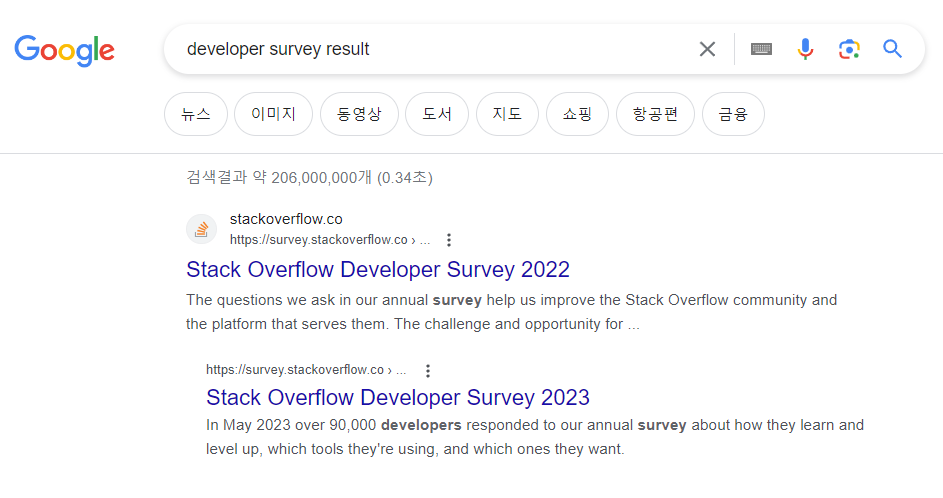

> https://survey.stackoverflow.co/2023/
> 설문조사 개요 페이지 방문
> 2023년 5월, 90,000명 개발자가 설문 응답
> 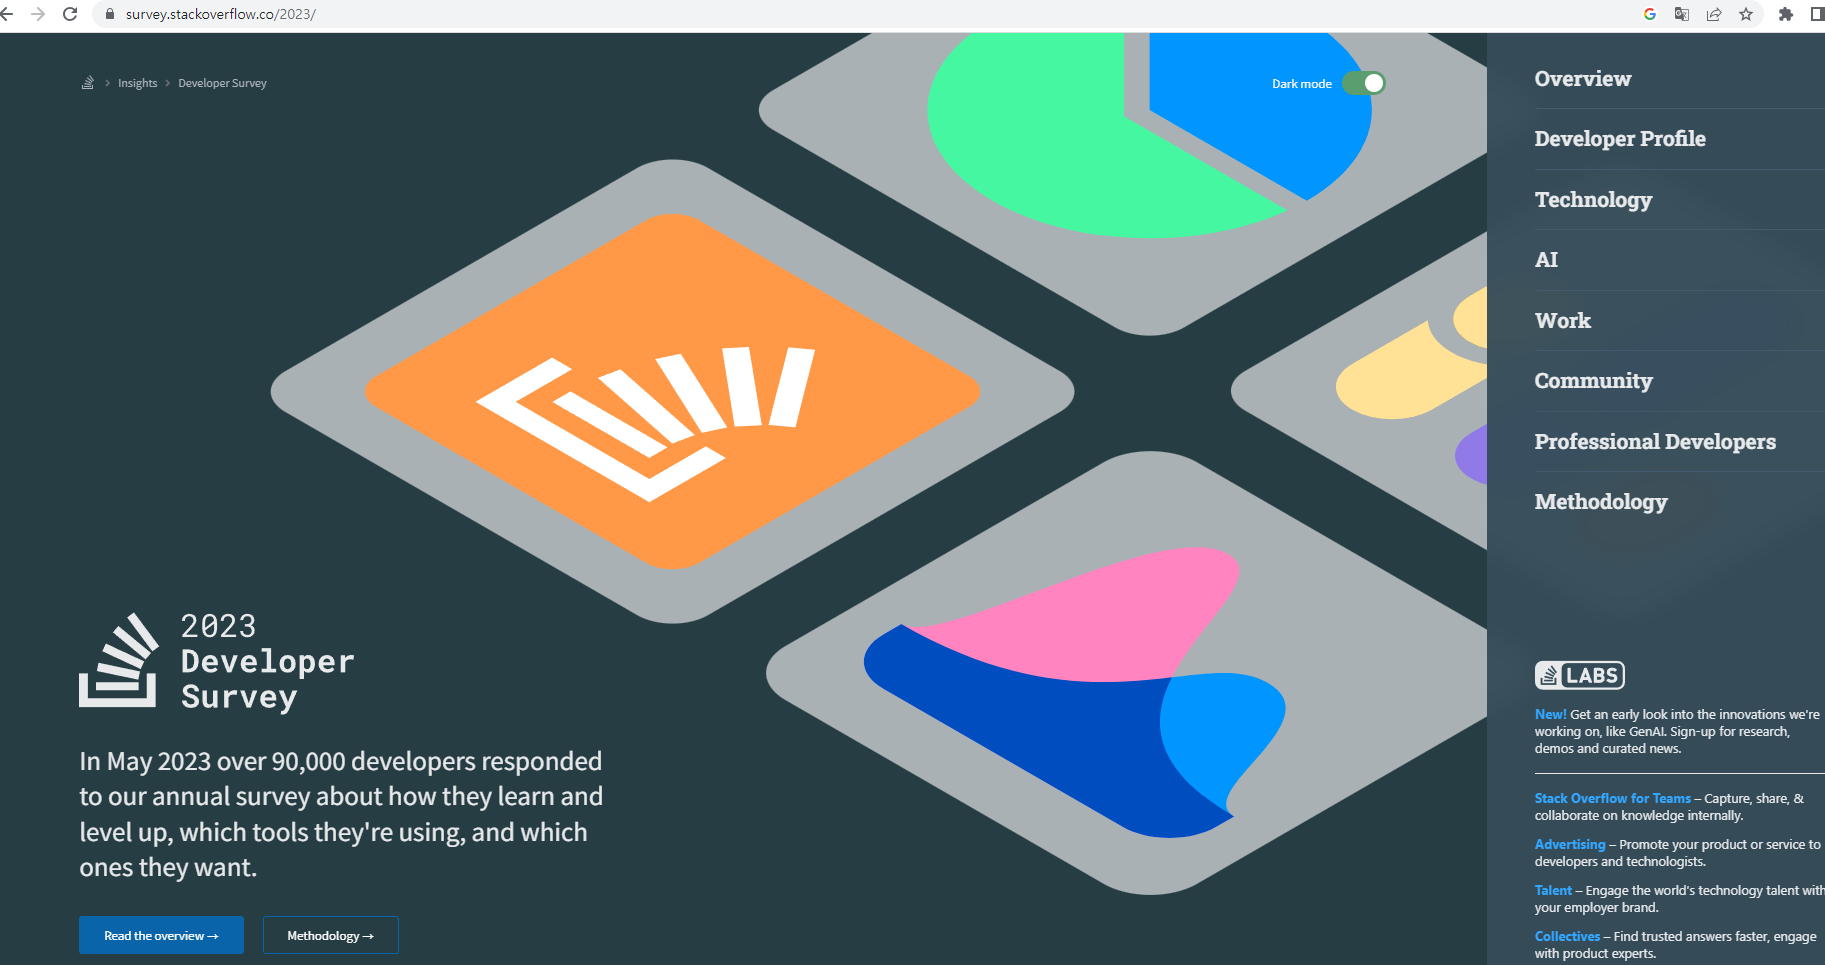

### 연령대별 프로그래밍 학습 방법
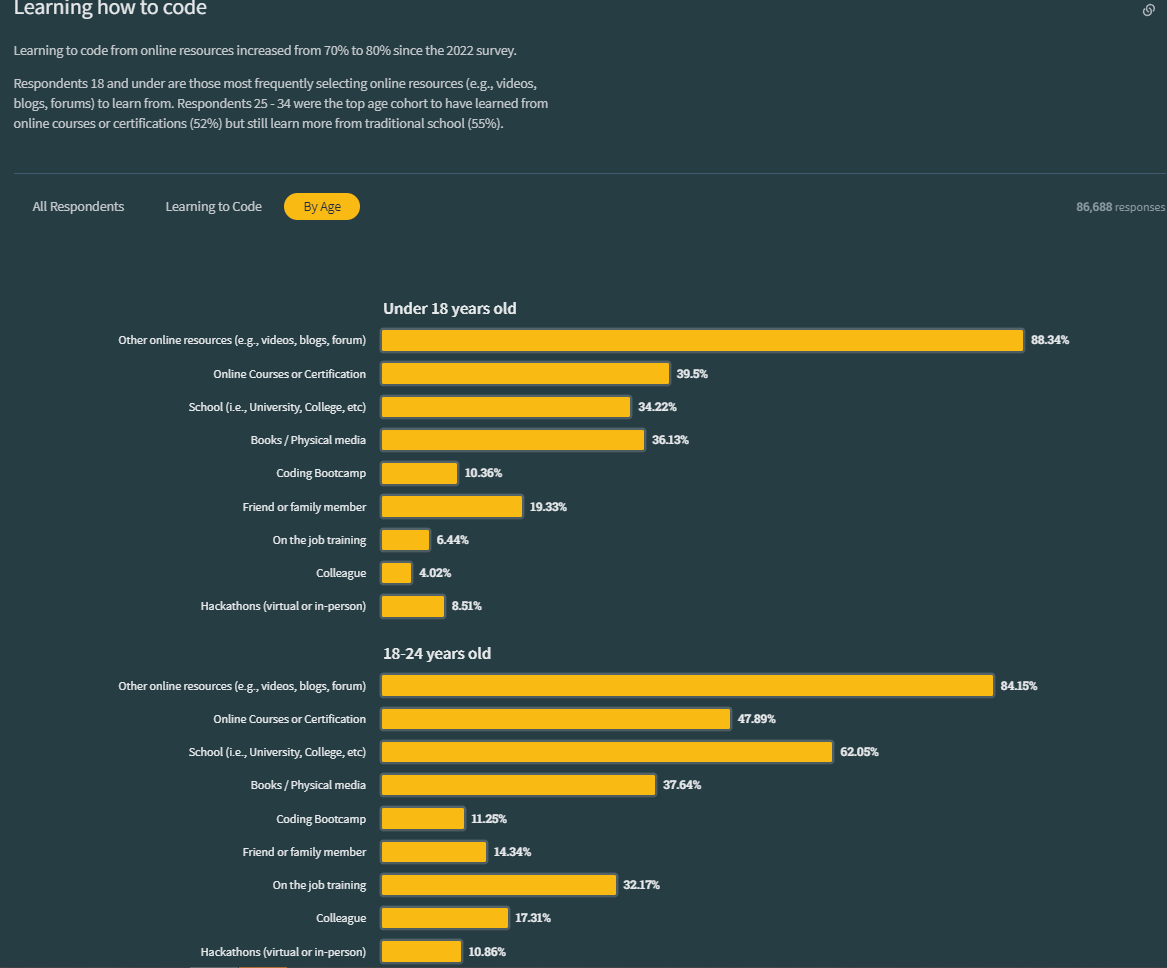

### 설문 응답 국가
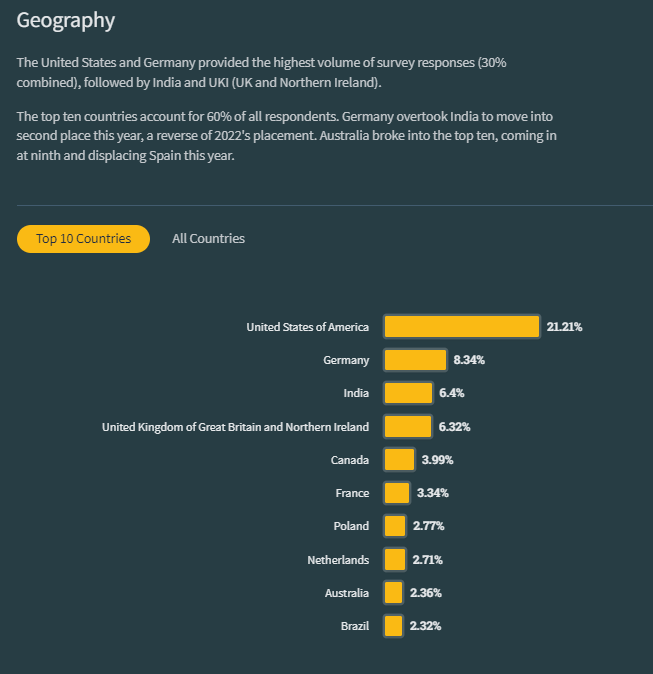
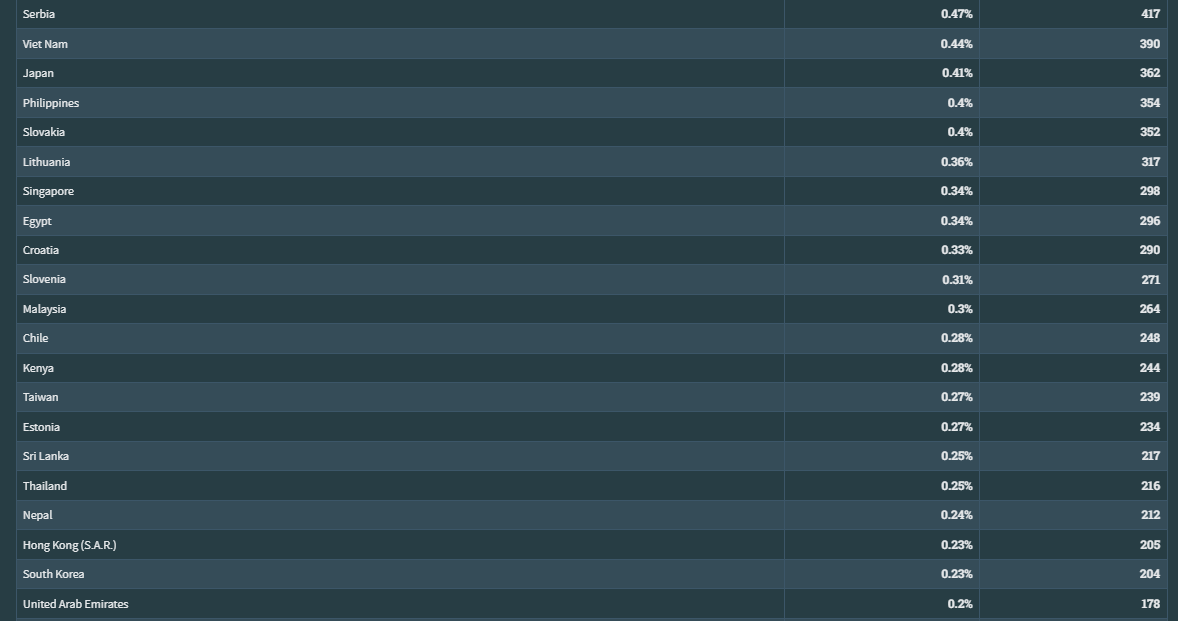

### 프로그래밍 언어 선호 비율
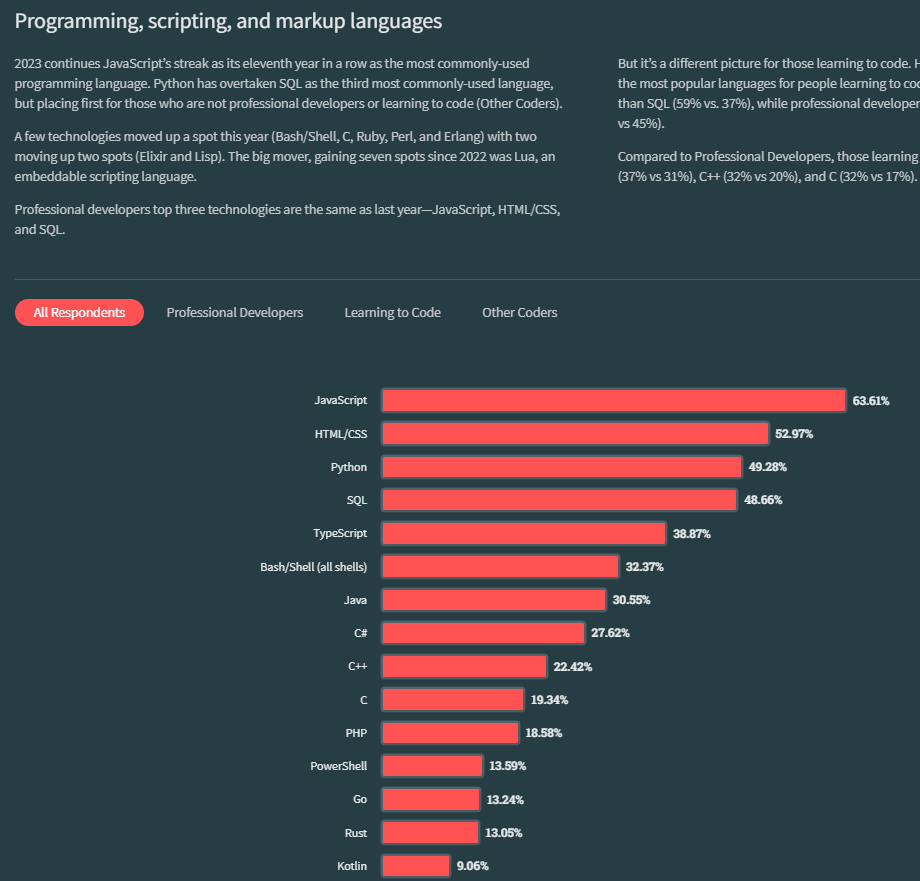

### 2. 데이터 다운로드 및 탑재 준비
 - 스택오버플로에서 진행하는 개발자 설문조사 데이터 ( https://insights.stackoverflow.com/survey )
 - 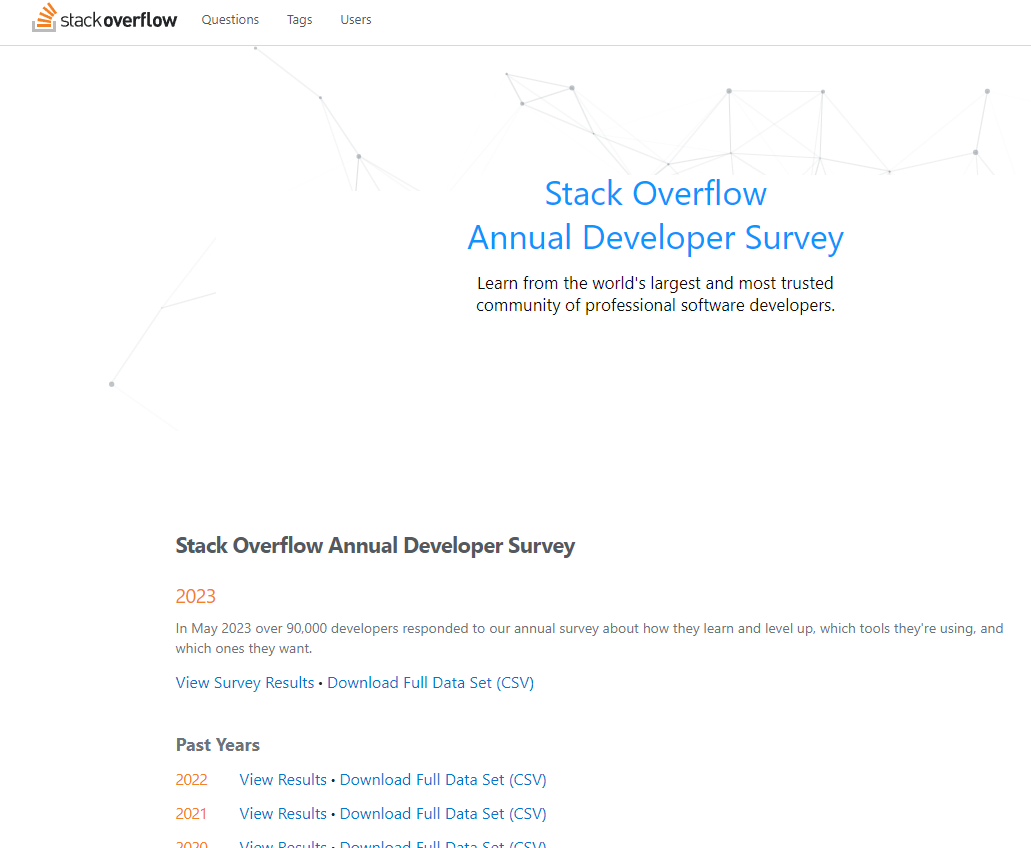

 - 다음의 4가지 파일로 구성됨
  1. RAEDME_2023.txt : 다운로드 파일에 대한 설명
  2. so_survey_2023.pdf : 설문조사 질문지
  3. survey_results_public.csv : 취합 결과
  4. survey_results_schema.csv : so_survey_2023.pdf 파일을 웹으로 표현한 파일


### 3. 데이터 읽어오기

In [ ]:
# Pandas 패키기 로드
import pandas as pd

# 설문지 취합 결과 파일 읽어오기
raw_data = pd.read_csv('survey_results_public.csv')

In [ ]:
# 데이터 확인
raw_data.info()

### 3. 데이터 정제 및 가공

In [ ]:
# 데이터 확인
raw_data.head()

In [ ]:
# 나이, 국가, 다룰 줄 아는 프로그래밍 언어, 프로그래밍을 배운 방법 변수만 추출
# 나이 - Age, 
# 국가 - Country, 
# 다룰 줄 아는 프로그래밍 언어 - LanguageHaveWorkedWith
# 프로그래밍을 배운 방법 - LearnCode

revised_data = raw_data[['Age', 'Country', 'LanguageHaveWorkedWith', 'LearnCode']]

revised_data.head()

In [ ]:
# 응답자 연령대 확인하기
# 89,184명이 응답
revised_data['Age']

In [ ]:
# 응답자 연령대 확인하기
# 중복 데이터 확인 - 8개 데이터 응답 유형 존재
revised_data['Age'].unique()

In [ ]:
# 나이 대별 설문 참여 수 확인
revised_data.groupby(['Age']).size()

In [ ]:
# 국가별 설문 참여 수 확인
revised_data.groupby(['Country']).size()

In [ ]:
# 응답에 참여한 국가 이름 확인
revised_data['Country'].unique()

In [ ]:
# 대한민국 응답자 수 확인 - 204명
revised_data.query('Country == "South Korea"').info()

### 4. 데이터 시각화

### 4.1 연령대별 응답자 수 그래프 그리기

In [ ]:
# 연령대별 설문 참여 수 확인
size_by_age = revised_data.groupby(['Age']).size()

# 시리즈로 반환
size_by_age

In [ ]:
type(size_by_age)

In [ ]:
# 라인 그래프 그리기
size_by_age.plot.line(rot=45)

In [ ]:
# 수직 막대 그래프 그리기
size_by_age.plot.bar()

In [ ]:
# 수평 막대 그래프 그리기
size_by_age.plot.barh()

In [ ]:
# 색인 확인하기
size_by_age.index

In [ ]:
# 색인 순서 변경하기
reindex_size_by_age = size_by_age.reindex(index = [
    'Prefer not to say', 
    '18-24 years old', 
    '25-34 years old', 
    '35-44 years old',
    '45-54 years old', 
    '55-64 years old', 
    '65 years or older',
    'Under 18 years old'])

In [ ]:
# 색인 순서 변경 확인하기
reindex_size_by_age.index

In [ ]:
# 색인 순서 변경 확인하기
reindex_size_by_age.plot.barh()

### 4.2 국가별 응답자 수 그래프 그리기

In [ ]:
# 국가별 설문 참여 수 확인
size_by_country = revised_data.groupby(['Country']).size()
size_by_country.head()

In [ ]:
# Pie 그래프 그리기
size_by_country.plot.pie()

In [ ]:
# Pie 그래프 크기 조정하기
# 가로, 세로 10인치로 조정
size_by_country.plot.pie(figsize=(10, 10))

In [ ]:
# 상위 20개국 확인
size_by_country.head()

In [ ]:
# 상위 20개국 확인
size_by_country.sort_values(ascending=False)

In [ ]:
# 상위 20개국 확인
size_by_country.nlargest(20)

In [ ]:
# 상위 20개국 파이 그래프 그리기
size_by_country.sort_values(ascending=False).head(20).plot.pie(figsize=(5, 5))

In [ ]:
# 상위 20개국 파이 그래프 그리기
size_by_country.nlargest(20).plot.pie(figsize=(5, 5))

### 4.3 많이 사용하는 프로그래밍 언어 그래프 그리기

In [ ]:
# 프로그래밍 언어 데이터 추출
# ';'으로 구분되어 있음을 확인
languages = revised_data['LanguageHaveWorkedWith']

languages.head()

In [ ]:
# 데이터 문자열을 구분자(';')로 구분
# 구분된 문자열은 리스트로 반환됨
languages = languages.str.split(';')

languages.head()

In [ ]:
# 리스트의 각 항목을 행으로 나누기

exploded_languages = languages.explode()

exploded_languages.head(10)

In [ ]:
# 프로그래밍별 응답수 구하기
exploded_languages.unique()

In [ ]:
# 프로그래밍별 응답수 구하기
size_by_language = exploded_languages.to_frame()
size_by_language

In [ ]:
# 프로그래밍별 응답수 구하기
size_by_language = size_by_language.groupby('LanguageHaveWorkedWith').size()
size_by_language

In [ ]:
# 상위 10개 프로그래밍 언어를 파이 그래프로 그리기
size_by_language.nlargest(10).plot.pie(figsize=(5, 5))

In [ ]:
# 상위 10개 프로그래밍 언어를 파이 그래프로 그리기
size_by_language.sort_values(ascending=False).head(10).plot.pie(figsize=(5, 5))

In [ ]:
# 백분율 표기하기
size_by_language.sort_values(ascending=False).head(10).plot.pie(figsize=(5, 5), autopct='%1.2f')

In [ ]:
# 원하는 연령대 데이터만 추출해서 그래프 그리기
revised_data.head()

In [ ]:
# 원하는 연령대 데이터(25-34 years old)만 추출해서 그래프 그리기
language_for_25_34 = revised_data.query('Age == "25-34 years old"')
language_for_25_34.head()

In [ ]:
language_for_25_34 = revised_data.query('Age == "25-34 years old"')['LanguageHaveWorkedWith'].str.split(';').explode()
language_for_25_34.head()

In [ ]:
# 상위 10개만 추출하여 파이 그래프 그리기
language_for_25_34.groupby(language_for_25_34).size().nlargest(10).plot.pie(figsize=(5, 5), autopct='%1.0f%%')

In [ ]:
# 상위 10개만 추출하여 파이 그래프 그리기
language_for_25_34.groupby(language_for_25_34).size().sort_values(ascending=False).head(10).\
plot.pie(figsize=(5, 5), autopct='%1.0f%%')

### 과제-1 :
> 설문에 응답한 개발자들이 어떻게 프로그래밍을 학습했는지 알고싶다

> LearnCode 데이터를 활용하여 백분율로 표기한 파이 그래프를 그려보자

### 과제-2 :
> 과제-1의 파이그래프를 연령대가 25~34세를 대상으로 백분율로 표기한 파이 그래프를 그려보자
